In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the person data from data frolder person_id.xlsx
person_data = pd.read_excel("person_id.xlsx")

In [4]:

#read release data
release = pd.read_excel("releases.xlsx") 

In [5]:
# read demographic data
demo = pd.read_excel("demographics.xlsx")

In [6]:
#read tthe data from the personal data file
person_data = pd.read_excel("person_id.xlsx")


In [7]:
# read the data from the institutional work
institutional = pd.read_excel("institutional_work.xlsx")

In [8]:
# read violations data
violation = pd.read_excel("violations.xlsx") 

In [9]:
## read classes data
cla= pd.read_excel("classes.xlsx")

In [10]:
# read supervision data
supervision = pd.read_excel("community_supervision.xlsx")

## Question 1 What are the characteristics of the population?

In [11]:
release.head()

,PERSON_ID,CYCLE,ADMISSION_DATE,RELEASE_DATE,AGE_AT_ADMISSION,AGE_AT_EXIT,COUNTY,MOCODE_DESC,OFFENSE_GROUP,SENTENCE_YEARS,ADMISSION_STATUS,ADMISSION_TYPE,RELEASE_TYPE,LAST_CUSTODY_LEVEL,LAST_MH_CODE,LAST_M_CODE,LAST_E_CODE,LAST_V_CODE,LAST_I_CODE,DEATH_DATE
0,97737218.0,2.0,2011-04-20,2012-11-02,47,48,DEKALB,23013 TAMPER WITH MOTOR VEH-1S,NONVIOLENT,5,PB,S,PPR,C-1,1,1,3,2,1,NaN
1,80832089.0,3.0,2016-05-11,2016-09-08,57,57,ST. FRANCOIS,13029 DOMESTIC ASSAULT-2ND DEG,VIOLENT,7,PB,I,PRB,,0,0,0,0,0,NaN
2,88054449.0,2.0,2013-06-05,2014-01-21,52,52,,22352 PR OFNDR RESIDE-1000 FT-,SEXCHLABUS,3,PB,S,PPR,C-1,2,1,1,5,1,NaN
3,68129888.0,2.0,2007-10-17,2009-04-03,42,43,,32450 POSS CONTROLLED SUBSTANC,DRUG,7,PB,S,PPR,C-1,3,2,1,2,1,NaN
4,78516984.0,2.0,2011-09-09,2015-06-12,53,56,ST. LOUIS COUNTY,13029 DOMESTIC ASSAULT-2ND DEG,VIOLENT,7,PB,S,PPR,C-1,1,2,1,2,1,NaN


In [12]:
# Ensure RELEASE_DATE and ADMISSION_DATE are datetime
release['RELEASE_DATE'] = pd.to_datetime(release['RELEASE_DATE'])
release['ADMISSION_DATE'] = pd.to_datetime(release['ADMISSION_DATE'])

# Get the range of years in the data
years = release['RELEASE_DATE'].dt.year.unique()
years = sorted(years)

results = []

for year in years:
    dec_1 = pd.Timestamp(year=year, month=12, day=1)
    # Count unique PERSON_IDs incarcerated on December 1st of that year
    mask = (release['ADMISSION_DATE'] <= dec_1) & (release['RELEASE_DATE'] > dec_1)
    count = release[mask]['PERSON_ID'].nunique()
    results.append({'YEAR': year, 'UNIQUE_PERSON_COUNT_ON_DEC_1': count})

unique_persons_dec1 = pd.DataFrame(results)
unique_persons_dec1

,YEAR,UNIQUE_PERSON_COUNT_ON_DEC_1
0,2009,9472
1,2010,9194
2,2011,9415
3,2012,9773
4,2013,9792
5,2014,9902
6,2015,9825
7,2016,9967
8,2017,10186
9,2018,9354


In [13]:
#distribution of Male and Female population per year - final_grouped_df
fig = px.bar(unique_persons_dec1, x='YEAR', y='UNIQUE_PERSON_COUNT_ON_DEC_1')
fig.show() 

In [14]:
# Ensure RELEASE_DATE and ADMISSION_DATE are datetime
release['RELEASE_DATE'] = pd.to_datetime(release['RELEASE_DATE'])
release['ADMISSION_DATE'] = pd.to_datetime(release['ADMISSION_DATE'])

# Get the range of years in the data
years = release['RELEASE_DATE'].dt.year.unique()
years = sorted(years)

results = []

for year in years:
    dec_31 = pd.Timestamp(year=year, month=12, day=31)
    # Count unique PERSON_IDs incarcerated on December 31st of that year
    mask = (release['ADMISSION_DATE'] <= dec_31) & (release['RELEASE_DATE'] > dec_31)
    count = release[mask]['PERSON_ID'].nunique()
    results.append({'YEAR': year, 'UNIQUE_PERSON_COUNT_ON_DEC_31': count})

unique_persons_dec31 = pd.DataFrame(results)
print(unique_persons_dec31)

    YEAR  UNIQUE_PERSON_COUNT_ON_DEC_31
0   2009                           9424
1   2010                           9267
2   2011                           9445
3   2012                           9637
4   2013                           9722
5   2014                           9898
6   2015                           9806
7   2016                           9923
8   2017                          10104
9   2018                           9207
10  2019                           6925
11  2020                           5265
12  2021                           4646
13  2022                           3344
14  2023                              0


In [15]:
max(release['ADMISSION_DATE'])

Timestamp('2023-12-08 00:00:00')

In [16]:
max(release['RELEASE_DATE'])

Timestamp('2023-12-30 00:00:00')

In [17]:
# filter rows with release year 2024 in descending order of relaease date
release_filtered = release[release['ADMISSION_DATE'].dt.year == 2023].sort_values(by='ADMISSION_DATE', ascending=False)
release_filtered


,PERSON_ID,CYCLE,ADMISSION_DATE,RELEASE_DATE,AGE_AT_ADMISSION,AGE_AT_EXIT,COUNTY,MOCODE_DESC,OFFENSE_GROUP,SENTENCE_YEARS,ADMISSION_STATUS,ADMISSION_TYPE,RELEASE_TYPE,LAST_CUSTODY_LEVEL,LAST_MH_CODE,LAST_M_CODE,LAST_E_CODE,LAST_V_CODE,LAST_I_CODE,DEATH_DATE
84463,30880632.0,2.0,2023-12-08,2023-12-29,33,33,DEKALB,52ADA DELIVER OR POSSESS WEAPO,VIOLENT,3,BP,S,CDR,C-2,1,2,1,3,2,NaN
108338,26030575.0,1.0,2023-11-16,2023-12-21,24,24,ST. LOUIS COUNTY,22AAA BURGLARY - 2ND DEGREE,NONVIOLENT,6,BP,S,CDR,C-5,3,2,4,4,5,NaN
109449,56721424.0,1.0,2023-11-15,2023-11-29,21,21,BOONE,13AAC ASSAULT - 3RD DEGREE,VIOLENT,4,PB,O,PRB,,0,0,0,0,0,NaN
93984,52943776.0,1.0,2023-10-24,2023-12-02,32,32,TANEY,32450 POSS CONTROLLED SUBSTANC,DRUG,4,PB,S,MXR,C-1,1,1,4,2,1,NaN
54866,23634761.0,2.0,2023-10-24,2023-11-29,37,37,BARTON,22AAA BURGLARY - 2ND DEGREE,NONVIOLENT,7,PB,L,PRB,,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110209,38595121.0,1.0,2023-01-03,2023-05-03,35,35,,35ACP POSSESS CONTROL SUBSTANC,DRUG,7,PB,O,PRB,,0,0,0,0,0,NaN
109257,37594306.0,1.0,2023-01-03,2023-05-03,22,22,,12AAB ROBBERY - 2ND DEGREE,VIOLENT,10,PB,O,PRB,,0,0,0,0,0,NaN
110314,87761031.0,1.0,2023-01-03,2023-05-03,31,32,SCHUYLER,28AAR RECEIVING STOLEN PROPERT,NONVIOLENT,7,PB,O,PRB,,0,0,0,0,0,NaN
110358,97061229.0,1.0,2023-01-03,2023-05-03,27,28,PLATTE,13ABL DOMESTIC ASSAULT - 2ND D,VIOLENT,4,PB,O,PRB,,0,0,0,0,0,NaN


In [18]:
merged = pd.merge(release, demo, on="PERSON_ID", how="left")

final_df = merged[["PERSON_ID", "SEX", "RACE", "ETHNICITY","ADMISSION_DATE", "RELEASE_DATE", "RELEASE_TYPE","COUNTY","OFFENSE_GROUP"]]

In [19]:

# Drop rows with missing admission or release dates
final_df = final_df.dropna(subset=["ADMISSION_DATE", "RELEASE_DATE"])

# Get the list of unique years from the release dates
years = sorted(final_df["RELEASE_DATE"].dt.year.dropna().unique())

# Store results in a list
all_results = []

for year in years:
    dec_1 = pd.Timestamp(year=year, month=12, day=1)

    # Filter incarcerated individuals on Dec 1 of that year
    mask = (final_df["ADMISSION_DATE"] <= dec_1) & (final_df["RELEASE_DATE"] > dec_1)
    active_on_dec1 = final_df[mask]

    # Group by SEX, RACE, COUNTY, OFFENSE_GROUP and count unique PERSON_IDs
    grouped = (
        active_on_dec1.groupby(["SEX"])
        .agg(UNIQUE_PERSON_COUNT=("PERSON_ID", "nunique"))
        .reset_index()
    )

    grouped["YEAR"] = year  # Add the year to the grouped DataFrame
    all_results.append(grouped)

# Combine all years into one DataFrame
final_grouped_df = pd.concat(all_results, ignore_index=True)

# Show sample of final grouped output
final_grouped_df


,SEX,UNIQUE_PERSON_COUNT,YEAR
0,F,1074,2009
1,M,8398,2009
2,F,1059,2010
3,M,8135,2010
4,F,1138,2011
5,M,8277,2011
6,F,1212,2012
7,M,8561,2012
8,F,1243,2013
9,M,8549,2013


In [20]:
#distribution of Male and Female population per year - final_grouped_df
fig = px.bar(final_grouped_df, x='YEAR', y='UNIQUE_PERSON_COUNT', color='SEX')
fig.show()  


In [21]:

# Drop rows with missing admission or release dates
final_df = final_df.dropna(subset=["ADMISSION_DATE", "RELEASE_DATE"])

# Get the list of unique years from the release dates
years = sorted(final_df["RELEASE_DATE"].dt.year.dropna().unique())

# Store results in a list
all_results = []

for year in years:
    dec_1 = pd.Timestamp(year=year, month=12, day=1)

    # Filter incarcerated individuals on Dec 1 of that year
    mask = (final_df["ADMISSION_DATE"] <= dec_1) & (final_df["RELEASE_DATE"] > dec_1)
    active_on_dec1 = final_df[mask]

    # Group by SEX, RACE, COUNTY, OFFENSE_GROUP and count unique PERSON_IDs
    grouped = (
        active_on_dec1.groupby(["OFFENSE_GROUP"])
        .agg(UNIQUE_PERSON_COUNT=("PERSON_ID", "nunique"))
        .reset_index()
    )

    grouped["YEAR"] = year  # Add the year to the grouped DataFrame
    all_results.append(grouped)

# Combine all years into one DataFrame
final_grouped_df = pd.concat(all_results, ignore_index=True)

# Show sample of final grouped output
final_grouped_df


,OFFENSE_GROUP,UNIQUE_PERSON_COUNT,YEAR
0,,5,2009
1,DRUG,2060,2009
2,DWI,382,2009
3,NONVIOLENT,3427,2009
4,SEXCHLABUS,859,2009
...,...,...,...
78,DRUG,136,2023
79,DWI,5,2023
80,NONVIOLENT,144,2023
81,SEXCHLABUS,17,2023


In [22]:

# Get list of unique offense groups
offense_groups = final_grouped_df["OFFENSE_GROUP"].unique()

# Create a separate trace for each offense group
fig = go.Figure()

# Add a trace per offense group
for group in offense_groups:
    group_df = final_grouped_df[final_grouped_df["OFFENSE_GROUP"] == group]
    fig.add_trace(go.Scatter(
        x=group_df["YEAR"],
        y=group_df["UNIQUE_PERSON_COUNT"],
        mode="lines+markers",
        name=group,
        visible=False
    ))

# Make the first trace visible by default
fig.data[0].visible = True

# Create dropdown menu
dropdown_buttons = [
    {
        "label": group,
        "method": "update",
        "args": [
            {"visible": [i == j for i in range(len(offense_groups))]},
            {"title": f"Trend for {group}"}
        ]
    }
    for j, group in enumerate(offense_groups)
]

# Add dropdown to layout
fig.update_layout(
    title="Yearly Incarceration Trend by Offense Group",
    xaxis_title="Year",
    yaxis_title="Unique Person Count",
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 1.15,
        "xanchor": "left",
        "y": 1.05,
        "yanchor": "top"
    }],
    height=500
)

fig.show()


In [23]:
fig = px.bar(unique_persons_dec1, x='YEAR', y='UNIQUE_PERSON_COUNT_ON_DEC_1',
             title='Incarcerated Population on December 1st by Year')
fig.show()


In [24]:
grouped_df = pd.concat(all_results)
fig = px.line(grouped_df, x='YEAR', y='UNIQUE_PERSON_COUNT',
              color='OFFENSE_GROUP', markers=True,
              title='Incarcerated Population by Offense Group Over Time')
fig.show()



## Question 2 : Have there been changes in the pattern of violation behavior over time?

In [25]:
violation.head()

,PERSON_ID,CYCLE,SEQUENCE_NO,VIOLATION_DATE,PRIMARY_RULE,SECONDARY_RULE
0,78516984.0,2.0,1,2013-12-02,22.1,24.1
1,63649787.0,3.0,27,2011-12-08,20.1,41.1
2,63649787.0,3.0,28,2011-12-12,33.2,41.1
3,63649787.0,3.0,29,2012-03-08,19.1,21.1
4,63649787.0,3.0,30,2012-09-09,20.1,30.1


In [26]:
violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222646 entries, 0 to 222645
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PERSON_ID       222605 non-null  float64
 1   CYCLE           222605 non-null  float64
 2   SEQUENCE_NO     222646 non-null  int64  
 3   VIOLATION_DATE  222646 non-null  object 
 4   PRIMARY_RULE    222646 non-null  float64
 5   SECONDARY_RULE  222646 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.2+ MB


In [27]:
#Analyze violation trends over time using the violations dataset.
#Convert 'VIOLATION_DATE' to datetime format.
violation['VIOLATION_DATE'] = pd.to_datetime(violation['VIOLATION_DATE'], errors='coerce')
#Extract year from each date and create a new column called 'VIOLATION_YEAR'.
#Group the data by 'VIOLATION_YEAR' and count the number of violations for each year.
violation['VIOLATION_YEAR'] = violation['VIOLATION_DATE'].dt.year

In [28]:
# count violations trends over the years
violation_year_trends = violation.groupby('VIOLATION_YEAR').size().reset_index(name='VIOLATION_COUNT')
# Display the first few rows of the violation year trends.  
violation_year_trends.head()
violation_year_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   VIOLATION_YEAR   18 non-null     int32
 1   VIOLATION_COUNT  18 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 344.0 bytes


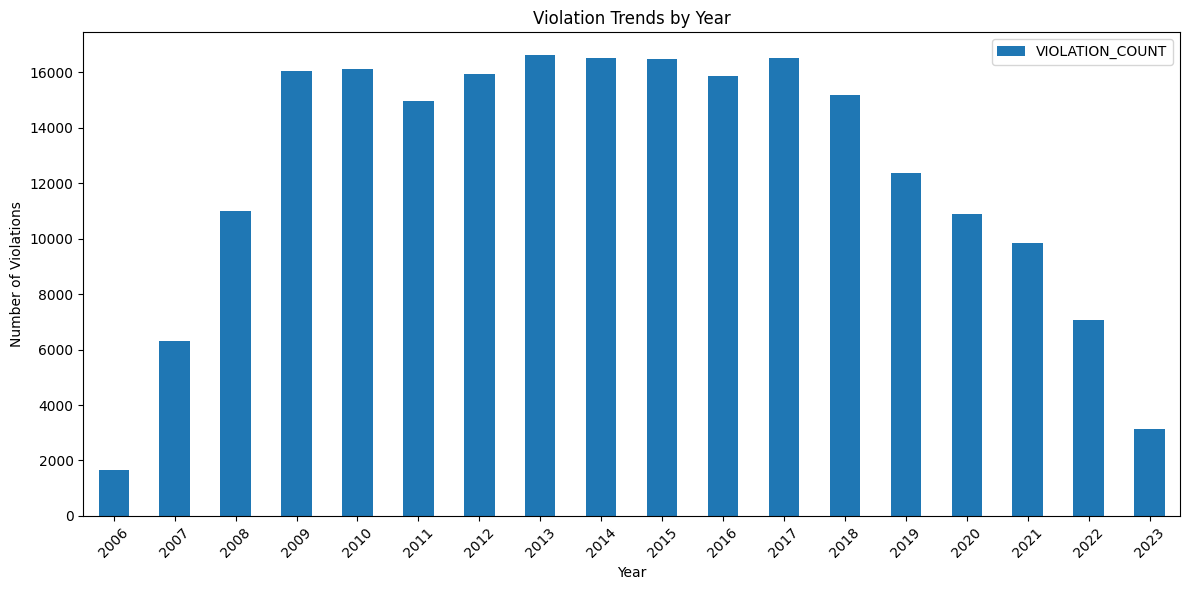

In [29]:
# display the violation trends by year diagram    
violation_year_trends.plot(x='VIOLATION_YEAR', y='VIOLATION_COUNT', kind='bar', figsize=(12, 6))
plt.title('Violation Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
      


In [30]:

# Group by YEAR and PRIMARY_RULE and count
rule_counts = (
    violation.groupby(["VIOLATION_YEAR", "PRIMARY_RULE"])
    .size()
    .reset_index(name="VIOLATION_COUNT")
)

# Get top 3 violations for each year
top3_rules_per_year = (
    rule_counts.sort_values(["VIOLATION_YEAR", "VIOLATION_COUNT"], ascending=[True, False])
    .groupby("VIOLATION_YEAR")
    .head(3)
    .reset_index(drop=True)
)

# Show the result
top3_rules_per_year.head()


,VIOLATION_YEAR,PRIMARY_RULE,VIOLATION_COUNT
0,2006,20.1,320
1,2006,19.1,221
2,2006,19.4,154
3,2007,20.1,1432
4,2007,19.1,866


In [31]:
#convert primary rule to string
top3_rules_per_year['PRIMARY_RULE'] = top3_rules_per_year['PRIMARY_RULE'].astype(str)

In [32]:
fig = px.bar(top3_rules_per_year, x='VIOLATION_YEAR', y='VIOLATION_COUNT', color='PRIMARY_RULE')
fig.show()  

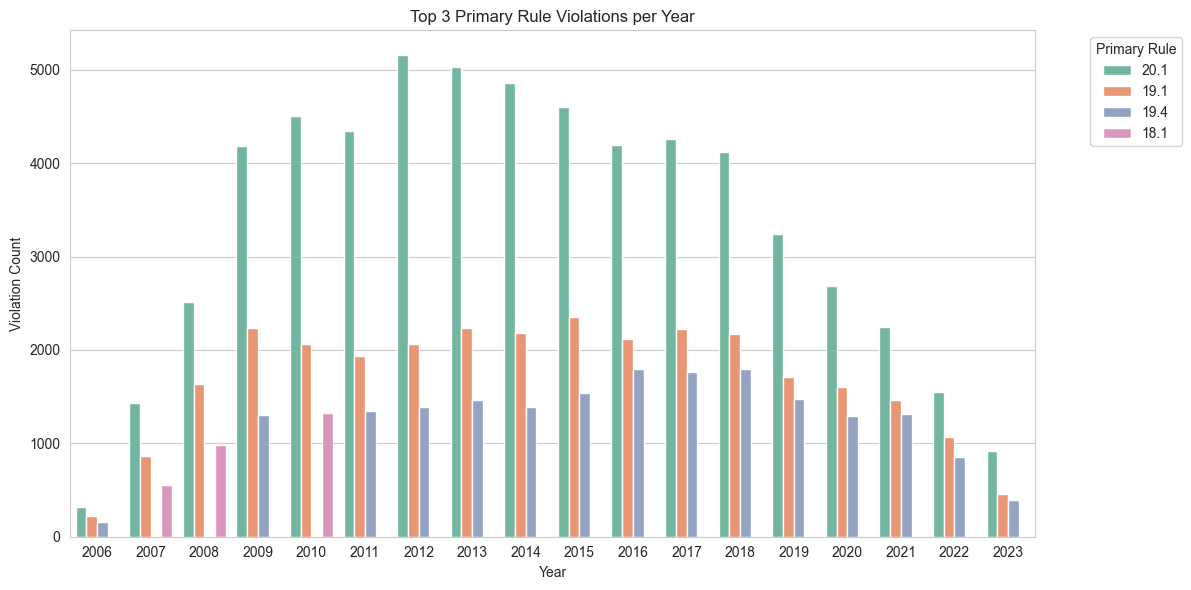

In [33]:
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create barplot
sns.barplot(
    data=top3_rules_per_year,
    x='VIOLATION_YEAR',
    y='VIOLATION_COUNT',
    hue='PRIMARY_RULE',
    palette='Set2'
)

plt.title("Top 3 Primary Rule Violations per Year")
plt.xlabel("Year")
plt.ylabel("Violation Count")
plt.legend(title='Primary Rule', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Question 3 : What are the most popular classes? And, are the successful completions rates comparable between them?

In [34]:

cla.head()

,PERSON_ID,CYCLE,PROGRAM_TITLE,CLASS_TITLE,START_DATE,STOP_DATE,EXIT_TYPE_CD
0,97737218.0,2.0,ANGER,ANGER MANAGEMENT,2012-03-15,2012-06-21,SFL
1,80832089.0,3.0,COGNITIVE,PATHWAY TO CHANGE,2016-08-02,2016-08-18,SFL
2,80832089.0,3.0,INSTITUTIONAL TREATMENT,"SHORT TERM (559.115, 217.785, BOARD)",2016-06-02,2016-09-08,SFL
3,68129888.0,2.0,LIFE SKILLS,EMPLOYABILITY SKILLS/LIFE SKILLS,2008-12-18,2009-02-25,SFL
4,78516984.0,2.0,ANGER,ANGER MANAGEMENT,2014-03-12,2014-05-28,SFL


In [35]:
cla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193202 entries, 0 to 193201
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PERSON_ID      193192 non-null  float64
 1   CYCLE          193192 non-null  float64
 2   PROGRAM_TITLE  193202 non-null  object 
 3   CLASS_TITLE    193202 non-null  object 
 4   START_DATE     193202 non-null  object 
 5   STOP_DATE      193202 non-null  object 
 6   EXIT_TYPE_CD   193202 non-null  object 
dtypes: float64(2), object(5)
memory usage: 10.3+ MB


In [36]:
# Ensure START_DATE is in datetime format
cla['START_DATE'] = pd.to_datetime(cla['START_DATE'], errors='coerce')  
# Extract year from each date and create a new column called 'START_YEAR'.
cla['START_YEAR'] = cla['START_DATE'].dt.year


In [37]:
cla.head()

,PERSON_ID,CYCLE,PROGRAM_TITLE,CLASS_TITLE,START_DATE,STOP_DATE,EXIT_TYPE_CD,START_YEAR
0,97737218.0,2.0,ANGER,ANGER MANAGEMENT,2012-03-15,2012-06-21,SFL,2012
1,80832089.0,3.0,COGNITIVE,PATHWAY TO CHANGE,2016-08-02,2016-08-18,SFL,2016
2,80832089.0,3.0,INSTITUTIONAL TREATMENT,"SHORT TERM (559.115, 217.785, BOARD)",2016-06-02,2016-09-08,SFL,2016
3,68129888.0,2.0,LIFE SKILLS,EMPLOYABILITY SKILLS/LIFE SKILLS,2008-12-18,2009-02-25,SFL,2008
4,78516984.0,2.0,ANGER,ANGER MANAGEMENT,2014-03-12,2014-05-28,SFL,2014


In [38]:

# Count how many people enrolled in each class
class_enrollment_count = cla.groupby(['CLASS_TITLE','START_YEAR']).size().reset_index(name='ENROLLMENT_COUNT')
# Display the class enrollment counts.
class_enrollment_count

,CLASS_TITLE,START_YEAR,ENROLLMENT_COUNT
0,10 WEEK PARTIAL DAY TREATMENT,2009,1
1,10 WEEK PARTIAL DAY TREATMENT,2010,20
2,10 WEEK PARTIAL DAY TREATMENT,2011,19
3,10 WEEK PARTIAL DAY TREATMENT,2012,18
4,10 WEEK PARTIAL DAY TREATMENT,2013,22
...,...,...,...
1280,WORKING A PROGRAM I,2018,6
1281,WORKING A PROGRAM II,2003,2
1282,WORKPLACE ESSENTIAL SKILLS,2007,1
1283,WORKPLACE ESSENTIAL SKILLS,2008,12


In [39]:
# Group by CLASS_TITLE and START_YEAR to get enrollment counts
class_enrollment_count = (
    cla.groupby(['START_YEAR', 'CLASS_TITLE'])
    .size()
    .reset_index(name='ENROLLMENT_COUNT')
)

# Sort by year and enrollment count descending
sorted_enrollments = class_enrollment_count.sort_values(
    ['START_YEAR', 'ENROLLMENT_COUNT'], ascending=[True, False]
)

# Pick the top class per year
most_popular_class_per_year = sorted_enrollments.drop_duplicates(subset=['START_YEAR'])

# Display the result
most_popular_class_per_year


,START_YEAR,CLASS_TITLE,ENROLLMENT_COUNT
0,1993,"SHORT TERM (559.115, 217.785, BOARD)",1
1,1995,"SHORT TERM (559.115, 217.785, BOARD)",2
2,1996,LONG TERM THERAPEUTIC COMMUNITY,1
5,1997,LONG TERM THERAPEUTIC COMMUNITY,3
11,1998,"SHORT TERM (559.115, 217.785, BOARD)",5
14,1999,LONG TERM THERAPEUTIC COMMUNITY,5
33,2000,SUBSTANCE ABUSE EDUCATION,18
58,2001,SUBSTANCE ABUSE EDUCATION,107
84,2002,SUBSTANCE ABUSE EDUCATION,115
113,2003,SUBSTANCE ABUSE EDUCATION,90


In [40]:
most_popular_class_per_year = most_popular_class_per_year[most_popular_class_per_year['START_YEAR'] >= 2000]
fig = px.bar(most_popular_class_per_year, x='START_YEAR', y='ENROLLMENT_COUNT', color='CLASS_TITLE')
fig.show()  

In [41]:
#  Get most popular class per year
class_enrollment_count = (
    cla.groupby(['START_YEAR', 'CLASS_TITLE'])
    .size()
    .reset_index(name='ENROLLMENT_COUNT')
)

# Sort and get top class per year
most_popular_class_per_year = (
    class_enrollment_count
    .sort_values(['START_YEAR', 'ENROLLMENT_COUNT'], ascending=[True, False])
    .drop_duplicates(subset=['START_YEAR'])
)

#  Merge with original cla to get EXIT_TYPE_CD
# This filters only the rows that match the popular class per year
cla["START_YEAR"] = pd.to_datetime(cla["START_DATE"], errors='coerce').dt.year  # Ensure correct year format
merged = pd.merge(cla, most_popular_class_per_year, on=["START_YEAR", "CLASS_TITLE"], how="inner")

#  Calculate SFL rate
sfl_stats = (
    merged.groupby(["START_YEAR", "CLASS_TITLE"])
    .agg(
        TOTAL_ENROLLMENTS=('PERSON_ID', 'count'),
        SFL_COMPLETIONS=('EXIT_TYPE_CD', lambda x: (x == 'SFL').sum())
    )
    .reset_index()
)

# Add SFL rate column
sfl_stats["SFL_RATE (%)"] = (sfl_stats["SFL_COMPLETIONS"] / sfl_stats["TOTAL_ENROLLMENTS"] * 100).round(2)

# Show results
sfl_stats.head()


,START_YEAR,CLASS_TITLE,TOTAL_ENROLLMENTS,SFL_COMPLETIONS,SFL_RATE (%)
0,1993,"SHORT TERM (559.115, 217.785, BOARD)",1,0,0.0
1,1995,"SHORT TERM (559.115, 217.785, BOARD)",2,0,0.0
2,1996,LONG TERM THERAPEUTIC COMMUNITY,1,0,0.0
3,1997,LONG TERM THERAPEUTIC COMMUNITY,3,3,100.0
4,1998,"SHORT TERM (559.115, 217.785, BOARD)",5,0,0.0


In [42]:
sfl_stats = sfl_stats[sfl_stats['START_YEAR']>=2000]
# Create line chart
fig = px.line(
    sfl_stats,
    x="START_YEAR",
    y="SFL_RATE (%)",
    color="CLASS_TITLE",
    markers=True,
    title=" Successful Completion Rate for Most Popular Class Each Year",
    labels={"START_YEAR": "Year", "SFL_RATE (%)": "SFL Completion Rate (%)"},
)

fig.update_layout(
    xaxis=dict(dtick=1),
    yaxis=dict(range=[0, 100]),
    hovermode="x unified",
    legend_title="Class Title"
)

fig.show()


## Question 4: Are there correlates between institutional work assignments and other variables, like conduct violations?

In [43]:

# display entire institutional work data
institutional.head()

,PERSON_ID,CYCLE,START_DATE,STOP_DATE,JOB_DESCRIPTION
0,97737218.0,2.0,2011-07-01,2012-07-19,Landscaping
1,97737218.0,2.0,2012-07-19,2012-11-02,Building Maintenance
2,88054449.0,2.0,2013-07-31,2013-10-15,Laundering/Dry Cleaning
3,88054449.0,2.0,2013-10-16,2014-01-21,Janitorial Services
4,68129888.0,2.0,2007-12-06,2008-03-25,Non-Food Handler


In [44]:
institutional.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358597 entries, 0 to 358596
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PERSON_ID        358584 non-null  float64
 1   CYCLE            358584 non-null  float64
 2   START_DATE       358597 non-null  object 
 3   STOP_DATE        358597 non-null  object 
 4   JOB_DESCRIPTION  358597 non-null  object 
dtypes: float64(2), object(3)
memory usage: 13.7+ MB


In [45]:
violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222646 entries, 0 to 222645
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PERSON_ID       222605 non-null  float64       
 1   CYCLE           222605 non-null  float64       
 2   SEQUENCE_NO     222646 non-null  int64         
 3   VIOLATION_DATE  222646 non-null  datetime64[ns]
 4   PRIMARY_RULE    222646 non-null  float64       
 5   SECONDARY_RULE  222646 non-null  float64       
 6   VIOLATION_YEAR  222646 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 11.0 MB


In [46]:
# Create a flag for those who participated in institutional work
institutional_flag = institutional.copy()
institutional_flag["WORKED"] = True

In [47]:
# Count number of violations per person
violations_count = violation.groupby(['PERSON_ID','CYCLE']).size().reset_index(name='VIOLATION_COUNT')
# Merge the institutional work data with the violations count   
institutional_with_violations = pd.merge(institutional_flag, violations_count, on=('PERSON_ID','CYCLE'), how='left')
# Display the first few rows of the merged data.
institutional_with_violations.head()

,PERSON_ID,CYCLE,START_DATE,STOP_DATE,JOB_DESCRIPTION,WORKED,VIOLATION_COUNT
0,97737218.0,2.0,2011-07-01,2012-07-19,Landscaping,True,NaN
1,97737218.0,2.0,2012-07-19,2012-11-02,Building Maintenance,True,NaN
2,88054449.0,2.0,2013-07-31,2013-10-15,Laundering/Dry Cleaning,True,NaN
3,88054449.0,2.0,2013-10-16,2014-01-21,Janitorial Services,True,NaN
4,68129888.0,2.0,2007-12-06,2008-03-25,Non-Food Handler,True,NaN


In [48]:
#filter rows where VIOLATION_COUNT  not NaN
institutional_with_violations = institutional_with_violations[institutional_with_violations['VIOLATION_COUNT']>0]
institutional_with_violations.head()

,PERSON_ID,CYCLE,START_DATE,STOP_DATE,JOB_DESCRIPTION,WORKED,VIOLATION_COUNT
10,78516984.0,2.0,2011-10-04,2011-10-18,Janitorial Services,True,1.0
11,78516984.0,2.0,2011-10-18,2011-10-28,Janitorial Services,True,1.0
12,78516984.0,2.0,2011-10-28,2012-09-27,Instructor/Tutor,True,1.0
13,78516984.0,2.0,2012-10-03,2013-01-11,Instructor/Tutor,True,1.0
14,78516984.0,2.0,2013-12-18,2014-05-27,Instructor/Tutor,True,1.0


In [49]:
violation = violation.drop_duplicates(subset="PERSON_ID")
institutional = institutional.drop_duplicates(subset="PERSON_ID")

In [50]:
# Merge work flag into the violation count table
institutional_with_violations['WORKED'] = institutional_with_violations['WORKED'].fillna(False)
# Display the first few rows of the final merged data.

institutional_with_violations.head()

,PERSON_ID,CYCLE,START_DATE,STOP_DATE,JOB_DESCRIPTION,WORKED,VIOLATION_COUNT
10,78516984.0,2.0,2011-10-04,2011-10-18,Janitorial Services,True,1.0
11,78516984.0,2.0,2011-10-18,2011-10-28,Janitorial Services,True,1.0
12,78516984.0,2.0,2011-10-28,2012-09-27,Instructor/Tutor,True,1.0
13,78516984.0,2.0,2012-10-03,2013-01-11,Instructor/Tutor,True,1.0
14,78516984.0,2.0,2013-12-18,2014-05-27,Instructor/Tutor,True,1.0


In [51]:

# Group by work status and summarize the number of violations
work_summary = institutional_with_violations.groupby('WORKED')['VIOLATION_COUNT'].agg(['count', 'sum', 'mean']).reset_index()
# Display results
print("work_summary")
print(work_summary)

work_summary
   WORKED   count        sum      mean
0    True  264837  2459041.0  9.285111


## Question 5 :How many people return to prison within two years of release?

In [52]:

release.columns = release.columns.str.strip().str.upper()

# Convert dates to datetime format
release['ADMISSION_DATE'] = pd.to_datetime(release['ADMISSION_DATE'])
release['RELEASE_DATE'] = pd.to_datetime(release['RELEASE_DATE'])

# Sort by person and admission date
release = release.sort_values(by=['PERSON_ID', 'ADMISSION_DATE'])

# Shift admission date to next row to detect return
release['NEXT_ADMISSION_DATE'] = release.groupby('PERSON_ID')['ADMISSION_DATE'].shift(-1)

# Calculate days between release and next admission
release['DAYS_BETWEEN'] = (release['NEXT_ADMISSION_DATE'] - release['RELEASE_DATE']).dt.days

# Flag returns within 730 days (2 years)
release['RETURN_WITHIN_2YRS'] = (release['DAYS_BETWEEN'] > 0) & (release['DAYS_BETWEEN'] <= 730)

# Count how many unique people returned within 2 years
returned_ids = release[release['RETURN_WITHIN_2YRS'] == True]['PERSON_ID'].nunique()
total_ids = release['PERSON_ID'].nunique()

# Calculate and print percentage
recidivism_rate = round((returned_ids / total_ids) * 100, 2)

print(f"{returned_ids} out of {total_ids} people returned to prison within 2 years. That's a {recidivism_rate}% recidivism rate.")


15370 out of 81953 people returned to prison within 2 years. That's a 18.75% recidivism rate.


C:\Users\cheth\AppData\Local\Temp\ipykernel_21884\330562869.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




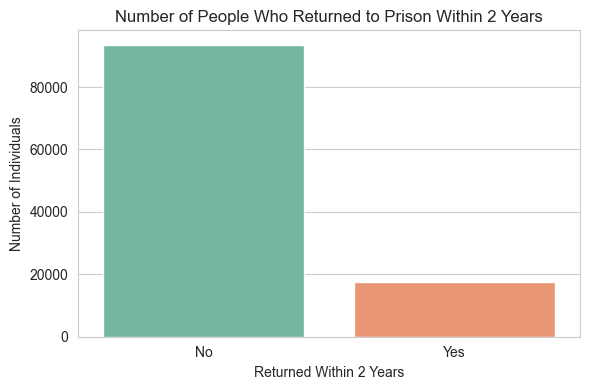

In [53]:
# Bar chart using RETURN_WITHIN_2YRS flag
return_counts = release['RETURN_WITHIN_2YRS'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=return_counts.index.map({False: 'No', True: 'Yes'}), y=return_counts.values, palette='Set2')
plt.title('Number of People Who Returned to Prison Within 2 Years')
plt.xlabel('Returned Within 2 Years')
plt.ylabel('Number of Individuals')
plt.tight_layout()
plt.show()

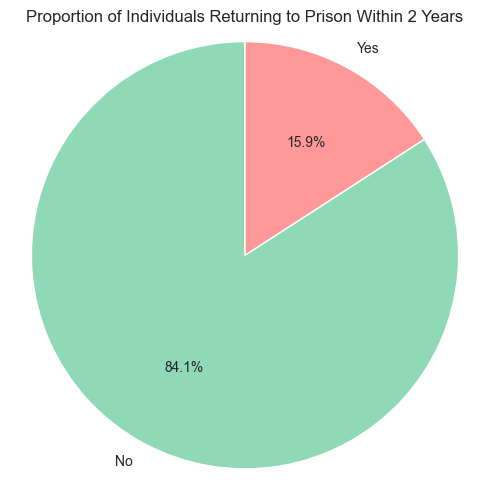

In [54]:
labels = ['No', 'Yes']
sizes = release['RETURN_WITHIN_2YRS'].value_counts().sort_index()
colors = ['#8fd9b6', '#ff9999']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Individuals Returning to Prison Within 2 Years')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [60]:
# Assuming your demographics DataFrame is called `population`
release = release.merge(demo[['PERSON_ID', 'SEX', 'RACE']], on='PERSON_ID', how='left')


In [61]:
# Drop duplicates to get one record per person
person_return_status = release.drop_duplicates(subset='PERSON_ID')[['PERSON_ID', 'RETURN_WITHIN_2YRS', 'SEX', 'RACE']]

# Group by Sex
sex_group = person_return_status.groupby('SEX')['RETURN_WITHIN_2YRS'].agg(['sum', 'count'])
sex_group['RECIDIVISM_RATE_%'] = round((sex_group['sum'] / sex_group['count']) * 100, 2)

# Group by Race
race_group = person_return_status.groupby('RACE')['RETURN_WITHIN_2YRS'].agg(['sum', 'count'])
race_group['RECIDIVISM_RATE_%'] = round((race_group['sum'] / race_group['count']) * 100, 2)

# Print results
print("📊 Recidivism by Sex:\n", sex_group)
print("\n📊 Recidivism by Race:\n", race_group)


📊 Recidivism by Sex:
        sum  count  RECIDIVISM_RATE_%
SEX                                 
F     3209  17419              18.42
M    10989  64535              17.03

📊 Recidivism by Race:
         sum  count  RECIDIVISM_RATE_%
RACE                                 
A        33    198              16.67
B      2330  18844              12.36
I        59    331              17.82
U         6     71               8.45
W     11770  62510              18.83


C:\Users\cheth\AppData\Local\Temp\ipykernel_21884\4105423055.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




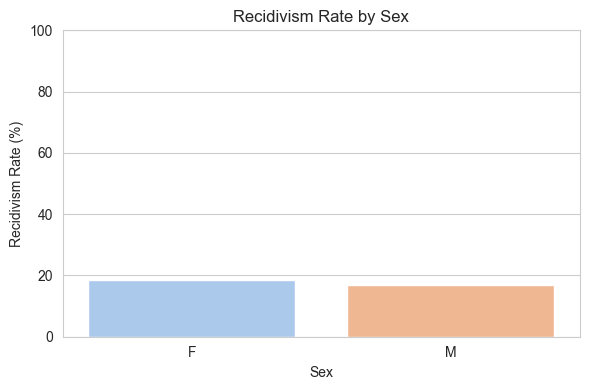

In [62]:


# Reset index to use columns as x-axis
sex_group_reset = sex_group.reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=sex_group_reset, x='SEX', y='RECIDIVISM_RATE_%', palette='pastel')
plt.title('Recidivism Rate by Sex')
plt.ylabel('Recidivism Rate (%)')
plt.xlabel('Sex')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


C:\Users\cheth\AppData\Local\Temp\ipykernel_21884\3757167189.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




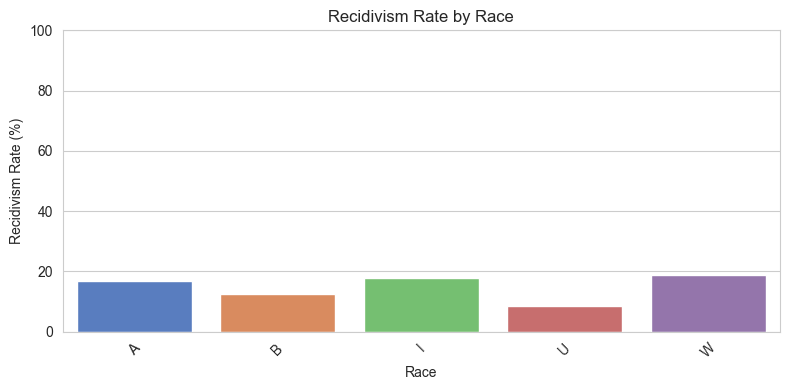

In [63]:
# Reset index to use columns as x-axis
race_group_reset = race_group.reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=race_group_reset, x='RACE', y='RECIDIVISM_RATE_%', palette='muted')
plt.title('Recidivism Rate by Race')
plt.ylabel('Recidivism Rate (%)')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
